# Heart Disease Prediction

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [5]:
#import dataset
heart_df = pd.read_csv('heart.csv')       
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [6]:
# information about the dataset
heart_df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
#description about dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_df.shape

(302, 14)

# Checking null values

In [9]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
heart_df.notnull().sum()

age         302
sex         302
cp          302
trestbps    302
chol        302
fbs         302
restecg     302
thalach     302
exang       302
oldpeak     302
slope       302
ca          302
thal        302
target      302
dtype: int64

In [11]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Exploratory Data Analysis(EDA)

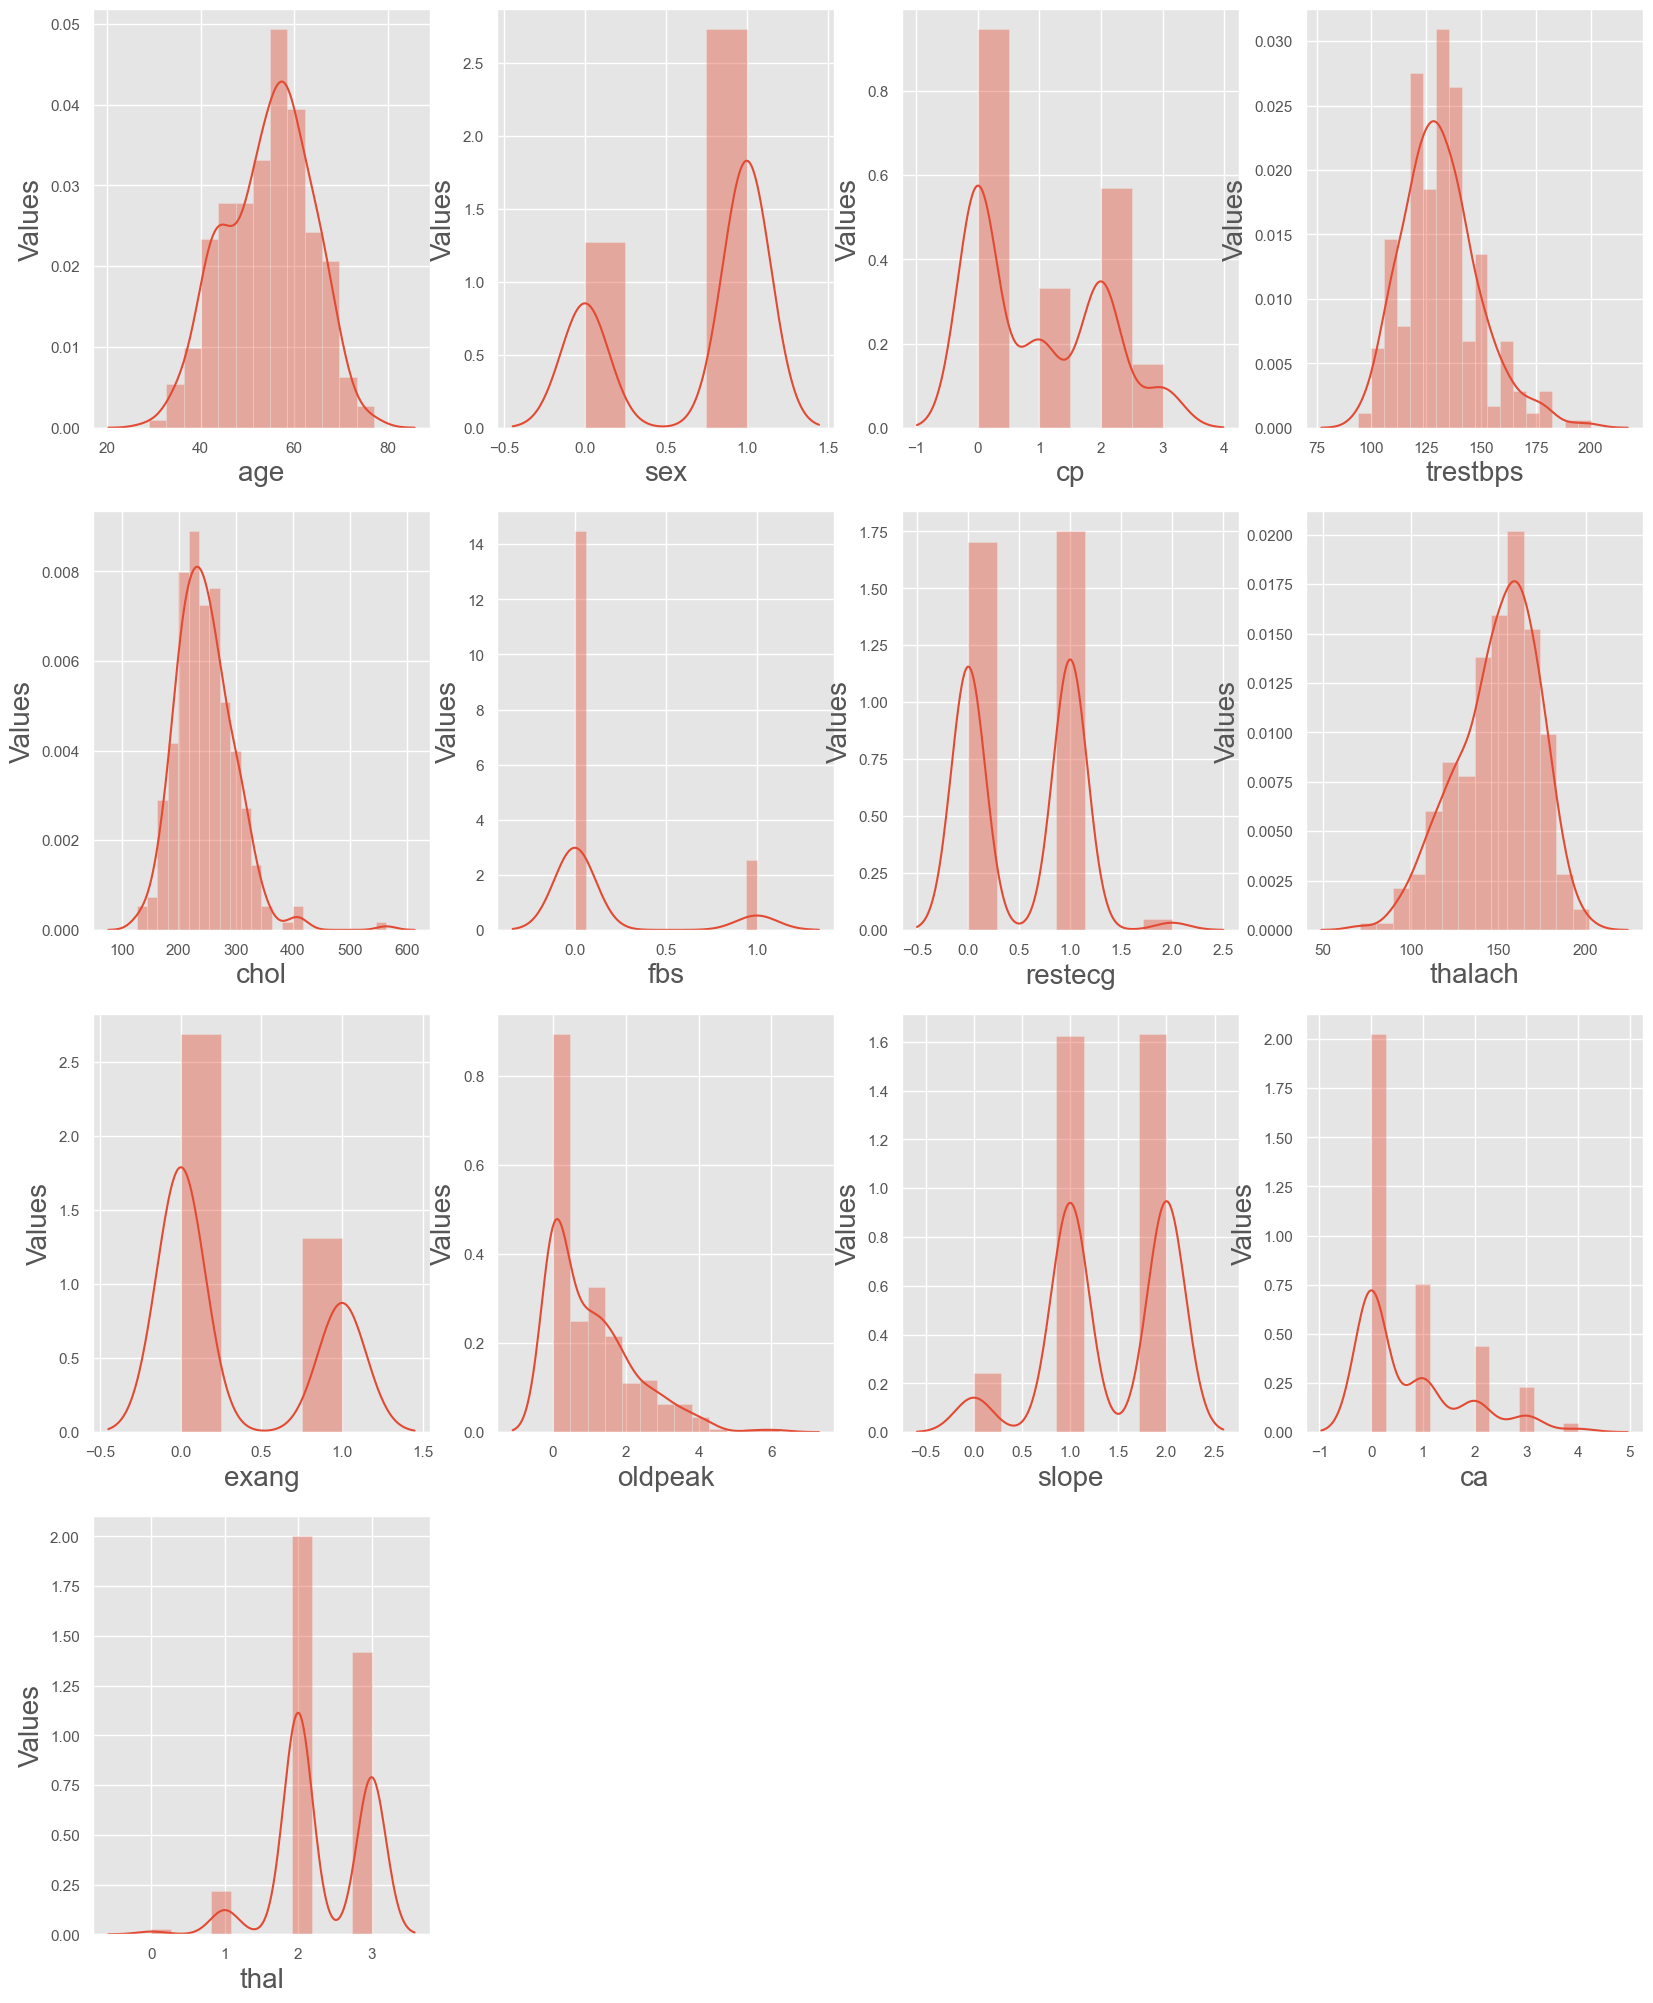

In [12]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(heart_df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

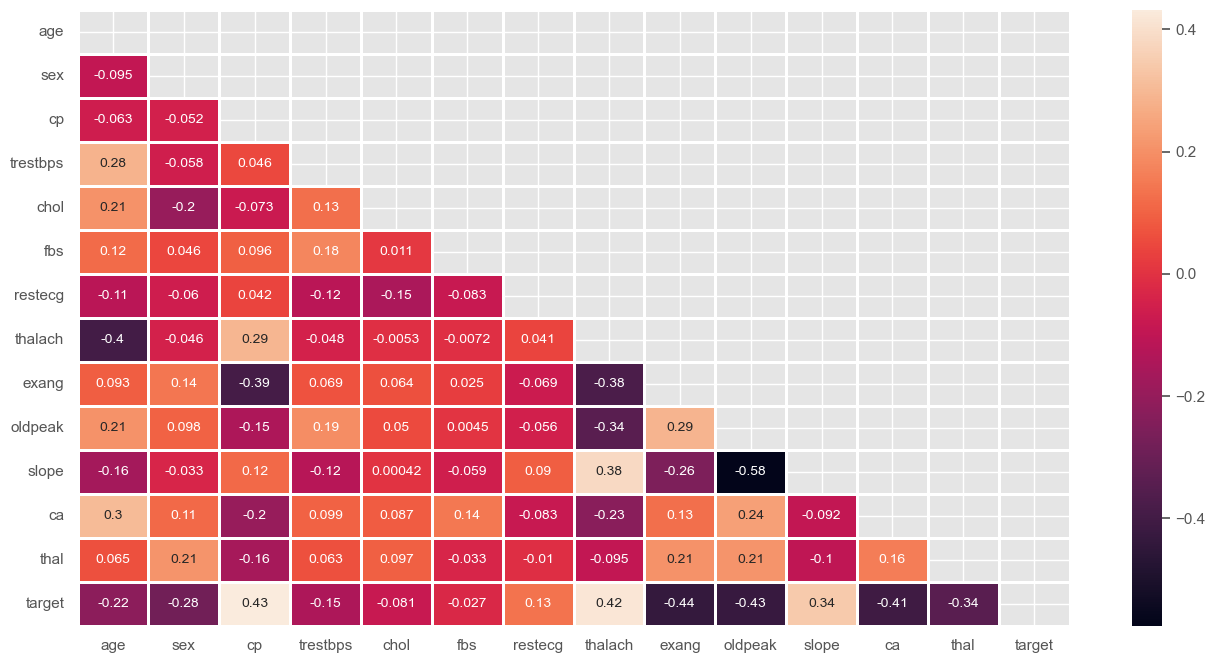

In [13]:
#Correlation matrix

plt.figure(figsize = (16, 8))

corr = heart_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [14]:
#checking the variance
heart_df.var()

age           81.865757
sex            0.217553
cp             1.065114
trestbps     308.472817
chol        2678.423588
fbs            0.127225
restecg        0.276705
thalach      524.571561
exang          0.221084
oldpeak        1.348971
slope          0.379794
ca             1.013542
thal           0.375800
target         0.248971
dtype: float64

We can see ,there is a huge variance.So,we should normalise it.

# Normalization

In [15]:
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])

trestbps    0.016939
chol        0.041196
thalach     0.027061
dtype: float64

In [16]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
x=heart_df.drop('target',axis=1)    
y=heart_df['target']

In [18]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 30.8 KB


# Logistic Regression

In [20]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 86.7298578199052 %
Testing accuracy score of the model is: 79.12087912087912 %


In [21]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred))

print("Classification Report",classification_report(y_test,y_pred))

Confusion matrix of the model [[27 14]
 [ 5 45]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.66      0.74        41
           1       0.76      0.90      0.83        50

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91



# KNearestNeighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['KNN']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 83.41232227488152 %
Testing accuracy score of the model is: 76.92307692307693 %


In [23]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))

Confusion matrix of the model [[28 13]
 [ 8 42]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.68      0.73        41
           1       0.76      0.84      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91



# SVM

In [24]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 69.19431279620854 %
Testing accuracy score of the model is: 67.03296703296702 %


In [25]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

print("Classification Report",classification_report(y_test,y_pred2))

Confusion matrix of the model [[27 14]
 [16 34]]
Classification Report               precision    recall  f1-score   support

           0       0.63      0.66      0.64        41
           1       0.71      0.68      0.69        50

    accuracy                           0.67        91
   macro avg       0.67      0.67      0.67        91
weighted avg       0.67      0.67      0.67        91



# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['DT']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 72.52747252747253 %


In [27]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

print("Classification Report",classification_report(y_test,y_pred3))

Confusion matrix of the model [[27 14]
 [11 39]]
Classification Report               precision    recall  f1-score   support

           0       0.71      0.66      0.68        41
           1       0.74      0.78      0.76        50

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91



In [28]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(dtc, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [29]:
grid_search.best_score_

0.8774891774891775

In [30]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'splitter': 'random'}

In [31]:
dtc2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
dtc2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='random')

In [32]:
y_pred4 = dtc2.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
accuracies['DT2']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc2.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 73.62637362637363 %


In [33]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred4))

print("Classification Report",classification_report(y_test,y_pred4))

Confusion matrix of the model [[27 14]
 [10 40]]
Classification Report               precision    recall  f1-score   support

           0       0.73      0.66      0.69        41
           1       0.74      0.80      0.77        50

    accuracy                           0.74        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.74      0.74      0.73        91



In [34]:
# update dictionary
accuracies['DT']=acc4*100
del accuracies['DT2']

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

acc5=accuracy_score(y_test,y_pred5)
accuracies['RF']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 97.1563981042654 %
Testing accuracy score of the model is: 76.92307692307693 %


In [36]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))

Confusion matrix of the model [[27 14]
 [ 7 43]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.66      0.72        41
           1       0.75      0.86      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91



# Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'log_loss', n_estimators = 180)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6 = accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

Training accuracy score of the model is: 99.52606635071089 %
Testing accuracy score of the model is: 73.62637362637363 %


# XGBoost

In [36]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
y_pred7 = xgb.predict(x_test)

acc7=accuracy_score(y_test,y_pred7)

accuracies['XGBoost']=acc7*100
print("Training accuracy score of the model is:",accuracy_score(y_train, xgb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred7)*100,"%")

Training accuracy score of the model is: 96.2085308056872 %
Testing accuracy score of the model is: 71.42857142857143 %


In [38]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred7))

print("Classification Report",classification_report(y_test,y_pred7))

Confusion matrix of the model [[26 15]
 [11 39]]
Classification Report               precision    recall  f1-score   support

           0       0.70      0.63      0.67        41
           1       0.72      0.78      0.75        50

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.71      0.71      0.71        91



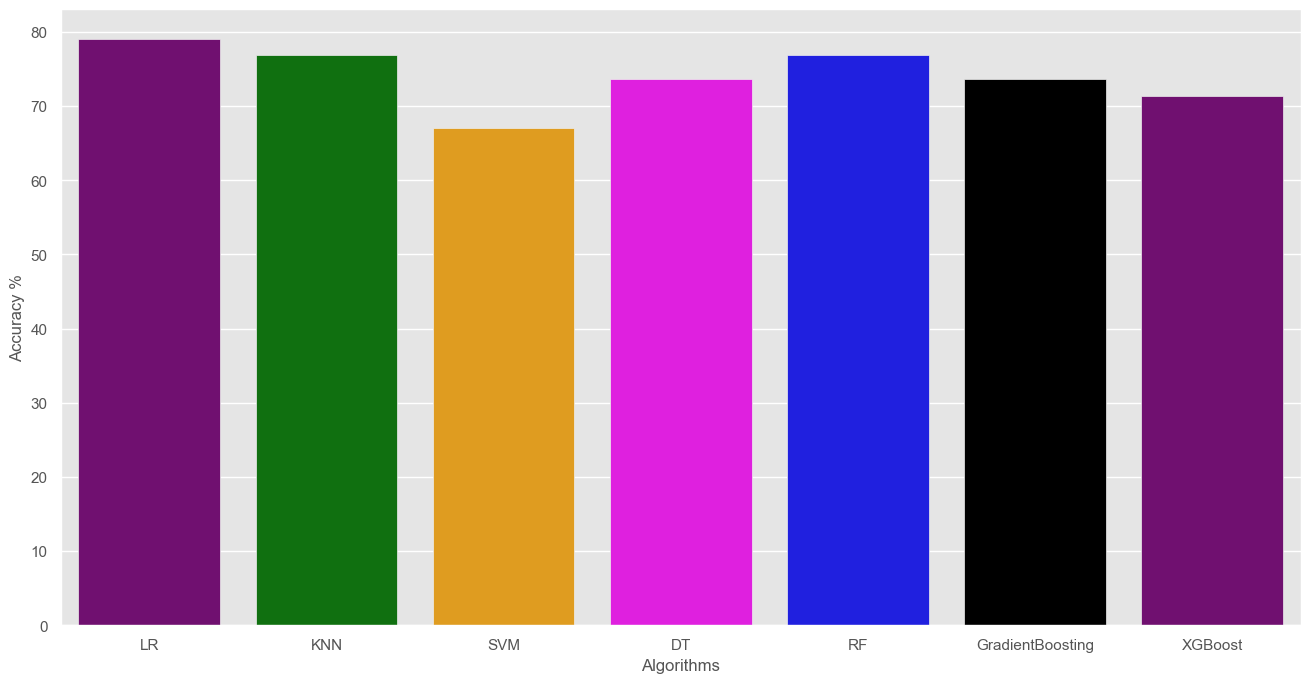

In [39]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [40]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XgBoost'],
    'Score': [acc, acc1, acc2, acc4, acc5, acc6, acc7]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.791209
1,KNN,0.769231
4,Random Forest,0.769231
3,Decision Tree,0.736264
5,Gradient Boosting,0.736264
6,XgBoost,0.714286
2,SVM,0.670330


In [42]:
import pickle
model = rfc
pickle.dump(model, open("heart.pkl",'wb'))

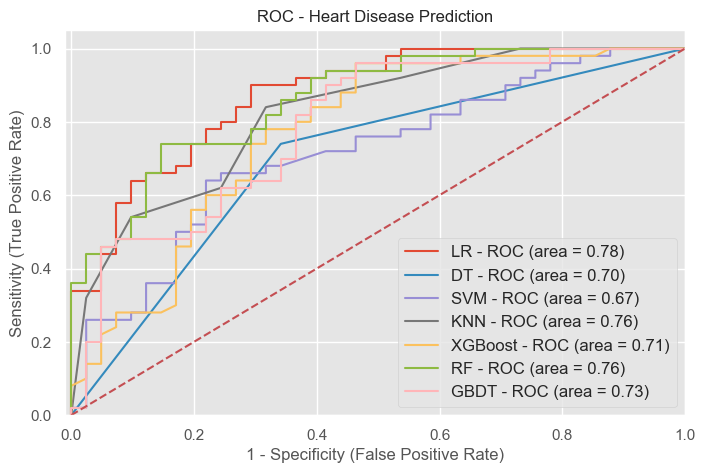

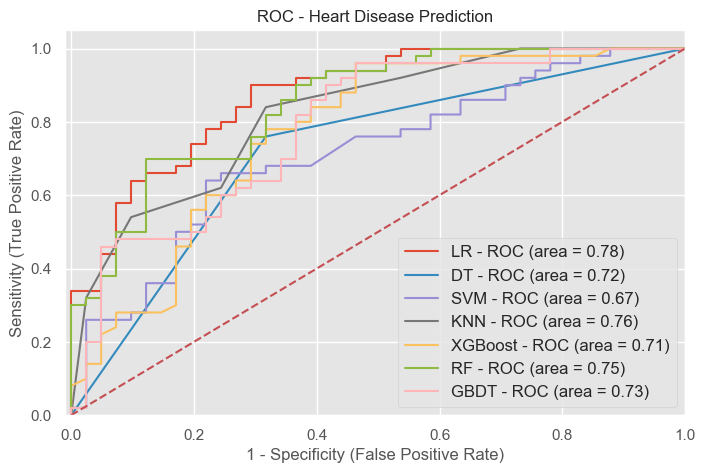

In [53]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc2,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rfc,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[79.12, 73.63, 67.03, 76.92, 71.43, 76.92, 73.63]
[77.92999999999999, 72.15, 66.93, 76.14999999999999, 70.71, 72.92999999999999, 72.71]


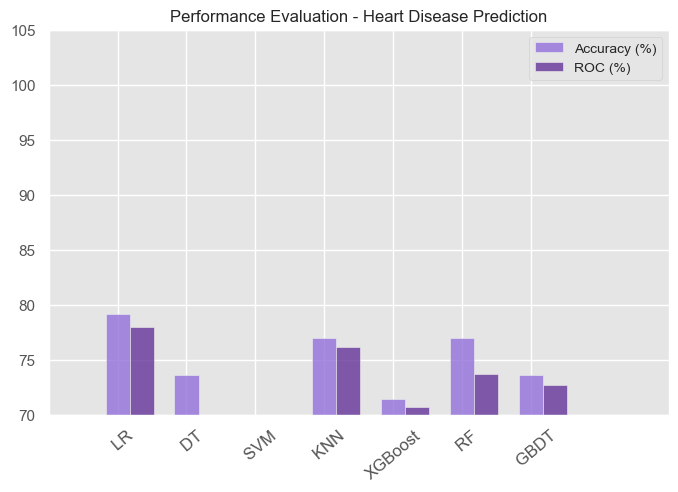

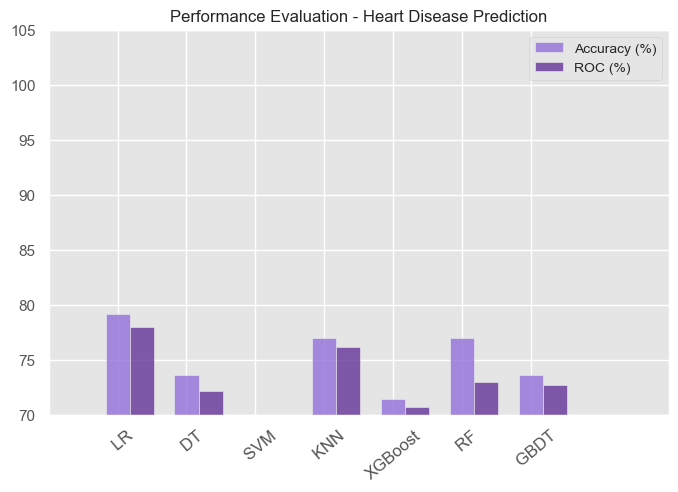

In [55]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc2,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rfc,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(acc,4), 100*round(acc4,4), 100*round(acc2,4), 100*round(acc1,4), 100*round(acc7,4), 
                  100*round(acc5,4), 100*round(acc6,4)]

for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 105])

plt.title('Performance Evaluation - Heart Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()